[View in Colaboratory](https://colab.research.google.com/github/zzune/KerasBasic/blob/master/Chapter4_2_earlystopping_patience.ipynb)

In [1]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

Using TensorFlow backend.


In [0]:
# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리
x_train = x_train.reshape(50000, 784).astype('float32') / 255.0
x_val = x_val.reshape(10000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋과 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

x_train = x_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]
x_val = x_val[val_rand_idxs]
y_val = y_val[val_rand_idxs]

# 라벨데이터 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [0]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [0]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [5]:
# 4. 모델 학습시키기
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience = 20)
hist = model.fit(x_train, y_train, epochs=3000, batch_size=10, validation_data=(x_val, y_val),
                callbacks=[early_stopping])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 248us/step - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
Epoch 2/3000
700/700 [==============================] - 0s 162us/step - loss: 2.2072 - acc: 0.1657 - val_loss: 2.1908 - val_acc: 0.1800
Epoch 3/3000
700/700 [==============================] - 0s 158us/step - loss: 2.1729 - acc: 0.1729 - val_loss: 2.1630 - val_acc: 0.1867
Epoch 4/3000
700/700 [==============================] - 0s 152us/step - loss: 2.1440 - acc: 0.1786 - val_loss: 2.1370 - val_acc: 0.1867
Epoch 5/3000
700/700 [==============================] - 0s 159us/step - loss: 2.1174 - acc: 0.1900 - val_loss: 2.1139 - val_acc: 0.1867
Epoch 6/3000
700/700 [==============================] - 0s 158us/step - loss: 2.0937 - acc: 0.2029 - val_loss: 2.0925 - val_acc: 0.2033
Epoch 7/3000
700/700 [==============================] - 0s 162us/step - loss: 2.0716 - acc: 0.2086 - val_loss: 2.0724 - val_acc: 0.2067
Ep

700/700 [==============================] - 0s 177us/step - loss: 1.9083 - acc: 0.2329 - val_loss: 1.9358 - val_acc: 0.2067
Epoch 22/3000
700/700 [==============================] - 0s 193us/step - loss: 1.9009 - acc: 0.2386 - val_loss: 1.9286 - val_acc: 0.2033
Epoch 23/3000
700/700 [==============================] - 0s 169us/step - loss: 1.8951 - acc: 0.2357 - val_loss: 1.9231 - val_acc: 0.2100
Epoch 24/3000
700/700 [==============================] - 0s 175us/step - loss: 1.8890 - acc: 0.2314 - val_loss: 1.9203 - val_acc: 0.2100
Epoch 25/3000
700/700 [==============================] - 0s 172us/step - loss: 1.8827 - acc: 0.2343 - val_loss: 1.9177 - val_acc: 0.2167
Epoch 26/3000
700/700 [==============================] - 0s 164us/step - loss: 1.8767 - acc: 0.2286 - val_loss: 1.9101 - val_acc: 0.2167
Epoch 27/3000
700/700 [==============================] - 0s 175us/step - loss: 1.8711 - acc: 0.2357 - val_loss: 1.9097 - val_acc: 0.2167
Epoch 28/3000
700/700 [==============================] 

Epoch 42/3000
700/700 [==============================] - 0s 165us/step - loss: 1.8073 - acc: 0.2500 - val_loss: 1.8634 - val_acc: 0.1833
Epoch 43/3000
700/700 [==============================] - 0s 188us/step - loss: 1.8043 - acc: 0.2429 - val_loss: 1.8617 - val_acc: 0.1700
Epoch 44/3000
700/700 [==============================] - 0s 174us/step - loss: 1.7999 - acc: 0.2371 - val_loss: 1.8568 - val_acc: 0.1933
Epoch 45/3000
700/700 [==============================] - 0s 185us/step - loss: 1.7967 - acc: 0.2429 - val_loss: 1.8563 - val_acc: 0.1700
Epoch 46/3000
700/700 [==============================] - 0s 175us/step - loss: 1.7936 - acc: 0.2271 - val_loss: 1.8526 - val_acc: 0.1900
Epoch 47/3000
700/700 [==============================] - 0s 169us/step - loss: 1.7911 - acc: 0.2614 - val_loss: 1.8551 - val_acc: 0.1800
Epoch 48/3000
700/700 [==============================] - 0s 178us/step - loss: 1.7883 - acc: 0.2486 - val_loss: 1.8544 - val_acc: 0.1800
Epoch 49/3000
700/700 [==================

Epoch 62/3000
700/700 [==============================] - 0s 173us/step - loss: 1.7529 - acc: 0.2700 - val_loss: 1.8314 - val_acc: 0.2267
Epoch 63/3000
700/700 [==============================] - 0s 179us/step - loss: 1.7503 - acc: 0.2871 - val_loss: 1.8302 - val_acc: 0.2033
Epoch 64/3000
700/700 [==============================] - 0s 168us/step - loss: 1.7481 - acc: 0.2786 - val_loss: 1.8276 - val_acc: 0.2167
Epoch 65/3000
700/700 [==============================] - 0s 182us/step - loss: 1.7455 - acc: 0.2814 - val_loss: 1.8304 - val_acc: 0.2033
Epoch 66/3000
700/700 [==============================] - 0s 169us/step - loss: 1.7437 - acc: 0.2771 - val_loss: 1.8301 - val_acc: 0.2067
Epoch 67/3000
700/700 [==============================] - 0s 168us/step - loss: 1.7417 - acc: 0.2729 - val_loss: 1.8292 - val_acc: 0.2067
Epoch 68/3000
700/700 [==============================] - 0s 178us/step - loss: 1.7403 - acc: 0.2729 - val_loss: 1.8244 - val_acc: 0.2000
Epoch 69/3000
700/700 [==================

700/700 [==============================] - 0s 170us/step - loss: 1.7139 - acc: 0.2771 - val_loss: 1.8154 - val_acc: 0.2700
Epoch 83/3000
700/700 [==============================] - 0s 173us/step - loss: 1.7131 - acc: 0.2843 - val_loss: 1.8197 - val_acc: 0.2400
Epoch 84/3000
700/700 [==============================] - 0s 168us/step - loss: 1.7123 - acc: 0.2971 - val_loss: 1.8222 - val_acc: 0.2167
Epoch 85/3000
700/700 [==============================] - 0s 172us/step - loss: 1.7096 - acc: 0.2971 - val_loss: 1.8157 - val_acc: 0.2300
Epoch 86/3000
700/700 [==============================] - 0s 162us/step - loss: 1.7080 - acc: 0.2786 - val_loss: 1.8157 - val_acc: 0.2633
Epoch 87/3000
700/700 [==============================] - 0s 172us/step - loss: 1.7049 - acc: 0.3071 - val_loss: 1.8198 - val_acc: 0.2667
Epoch 88/3000
700/700 [==============================] - 0s 174us/step - loss: 1.7060 - acc: 0.3057 - val_loss: 1.8116 - val_acc: 0.2433
Epoch 89/3000
700/700 [==============================] 

700/700 [==============================] - 0s 184us/step - loss: 1.6841 - acc: 0.2986 - val_loss: 1.8103 - val_acc: 0.2500
Epoch 104/3000
700/700 [==============================] - 0s 164us/step - loss: 1.6841 - acc: 0.3171 - val_loss: 1.8125 - val_acc: 0.2200
Epoch 105/3000
700/700 [==============================] - 0s 163us/step - loss: 1.6819 - acc: 0.3071 - val_loss: 1.8066 - val_acc: 0.2067
Epoch 106/3000
700/700 [==============================] - 0s 178us/step - loss: 1.6812 - acc: 0.3143 - val_loss: 1.8181 - val_acc: 0.2233
Epoch 107/3000
700/700 [==============================] - 0s 160us/step - loss: 1.6803 - acc: 0.3100 - val_loss: 1.8235 - val_acc: 0.2367
Epoch 108/3000
700/700 [==============================] - 0s 165us/step - loss: 1.6782 - acc: 0.3043 - val_loss: 1.8172 - val_acc: 0.2767
Epoch 109/3000
700/700 [==============================] - 0s 165us/step - loss: 1.6781 - acc: 0.3157 - val_loss: 1.8183 - val_acc: 0.2267
Epoch 110/3000
700/700 [=========================

700/700 [==============================] - 0s 170us/step - loss: 1.6633 - acc: 0.3071 - val_loss: 1.8136 - val_acc: 0.2200
Epoch 124/3000
700/700 [==============================] - 0s 158us/step - loss: 1.6618 - acc: 0.3114 - val_loss: 1.8208 - val_acc: 0.2233
Epoch 125/3000
700/700 [==============================] - 0s 166us/step - loss: 1.6607 - acc: 0.3243 - val_loss: 1.8222 - val_acc: 0.2300


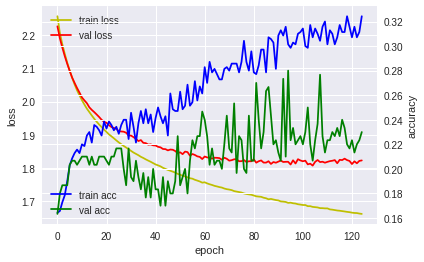

In [6]:
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [7]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)

print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuracy : ' + str(loss_and_metrics[1]))

10000/10000 [==============================] - 0s 32us/step

loss : 1.8420419506072998
accuracy : 0.2725
